In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [2]:
# import mnist data set
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-Shirt', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat', 
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle_boot']

In [4]:
# data exploration
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

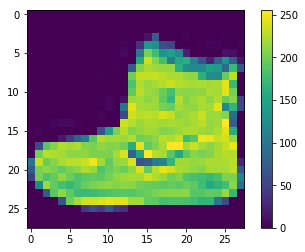

In [9]:
# preprocessing of data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

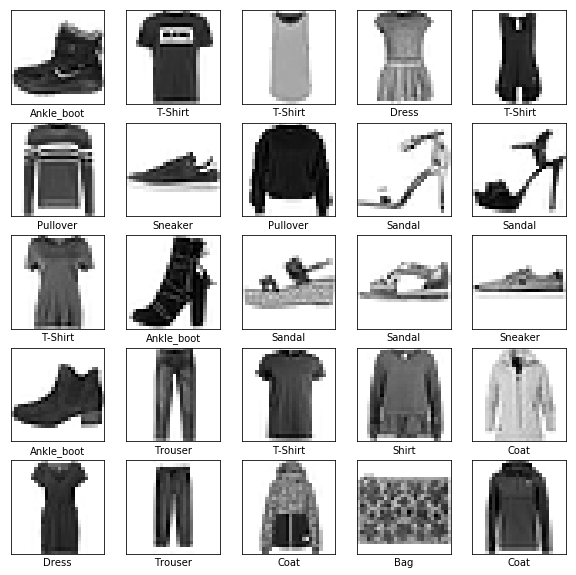

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
# Build the model
model = keras.Sequential([
    # input layer -> used to transform 2-d array into 1-d array; no learning is done here
    keras.layers.Flatten(input_shape=(28,28)),
    # hidden layer -> learning layer consisting of 128 dense or fully connected nodes respectively
    keras.layers.Dense(128, activation='relu'),
    # output layer -> output layer with ten nodes. Each node will produce 10 values ranging between 0 and 1
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.5014 - acc: 0.8244
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3737 - acc: 0.8655
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3365 - acc: 0.8781
Epoch 4/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3099 - acc: 0.8861
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2932 - acc: 0.8921
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2789 - acc: 0.8961
Epoch 7/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2658 - acc: 0.9011
Epoch 8/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2558 - acc: 0.9052
Epoch 9/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2466 - acc: 0.9079
Epoch 10/10
60000/60000 [==============================] - 3s 47us/sample - loss: 

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3516 - acc: 0.8767

Test accuracy: 0.8767


In [16]:
# Make predictions
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([1.6008738e-09, 9.2346020e-11, 1.8207541e-11, 1.1346200e-13,
       1.9406574e-11, 4.3374528e-03, 6.2317967e-10, 2.7387217e-03,
       6.6711348e-09, 9.9292386e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [20]:
class_names[9]

u'Ankle_boot'

In [26]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

<function matplotlib.pyplot.show>

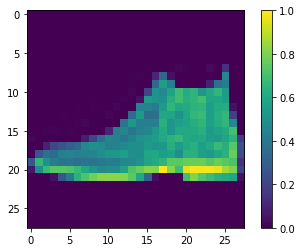

In [21]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show

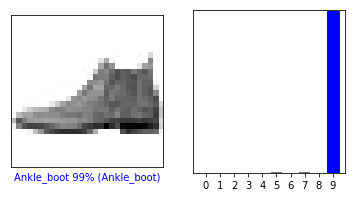

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

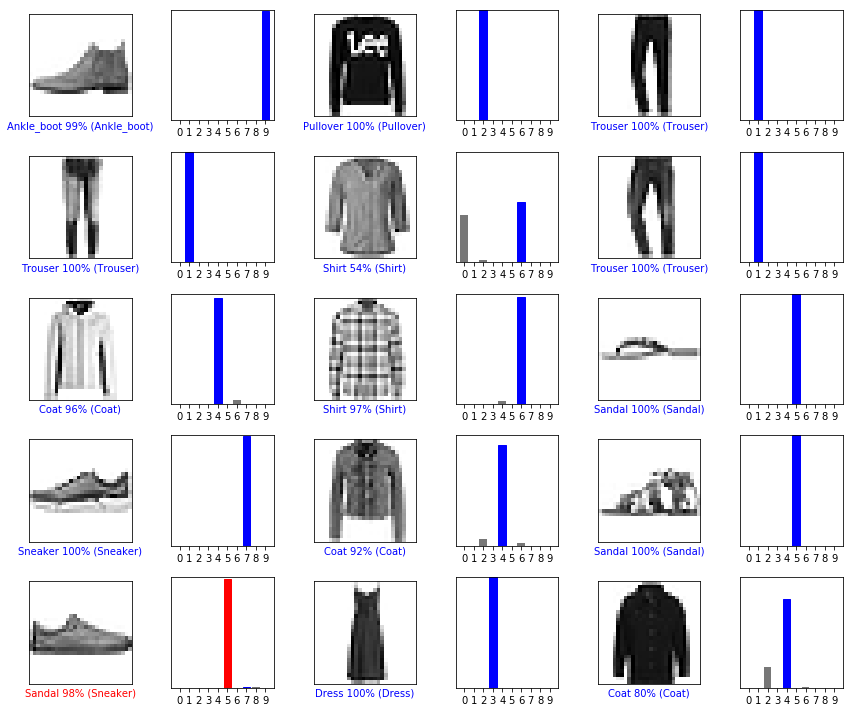

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [63]:
# Make a test
img = test_images[236]
print(img.shape)

(28, 28)


In [64]:
# Make test image a list
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [65]:
prediction_single = model.predict(img)
print(prediction_single)

[[3.1168387e-08 7.3456405e-13 1.0424657e-09 1.1398458e-12 1.9369251e-08
  9.9999964e-01 4.8702811e-09 2.9917442e-07 4.9688968e-09 1.1399850e-08]]


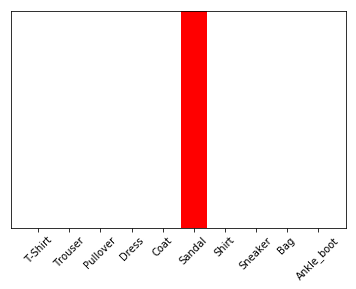

In [67]:
plot_value_array(1, prediction_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

<function matplotlib.pyplot.show>

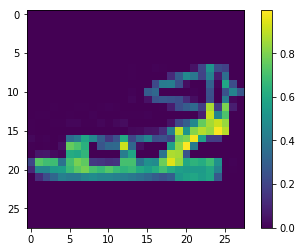

In [68]:
plt.figure()
plt.imshow(test_images[236])
plt.colorbar()
plt.grid(False)
plt.show